In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import missingno as msno

mpl.rc('font', family='Malgun Gothic')

# Mission 10

- 12_Data.csv 를 가져와 df2로 선언하여 아래와 같은 미션을 수행하고자 한다. 
- 해당 데이터는 홈쇼핑 대행 업체 데이터 

In [2]:
df2 = pd.read_csv('12_Data.csv')
df2

,방송Code,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,...,상품취소수량,상품취소금액,ARS금액,매입형태,배송방식,상품소요분,상품가중분,상품방송순번,방송시작시간,방송종료시간
0,1.010036e+09,TV,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,...,73,9624136,1000,위탁매입,협력사배송,50.0,52.7,1,2020-01-03T00:10,2020-01-03T01:00
1,1.019126e+09,TV,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,...,16,2547305,1000,위탁매입,직택배,30.0,19.1,1,2020-01-03T01:00,2020-01-03T02:00
2,1.019226e+09,TV,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,...,0,0,0,위탁매입,직택배,30.0,19.1,2,2020-01-03T01:00,2020-01-03T02:00
3,1.040337e+09,TV,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,...,25,1080206,1000,위탁매입,협력사배송,60.0,19.7,1,2020-01-03T02:00,2020-01-03T03:00
4,1.021427e+09,TV,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,...,5,238512,1000,위탁매입,협력사배송,60.0,16.1,1,2020-01-03T03:00,2020-01-03T04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26278,1.046263e+13,TV,60.0,94.3,생방송,가전,11179512,■연말특가■제우스커브드 UHD TV 65형,과세,92367433,...,20,11783638,1000,위탁매입,협력사배송,19.9,32.6,1,2021-11-13T21:45,2021-11-13T22:45
26279,1.046263e+13,TV,60.0,94.3,생방송,가전,11179514,2019 제우스 UHD TV 75형,과세,33698544,...,4,4683636,1000,위탁매입,협력사배송,26.7,41.9,2,2021-11-13T21:45,2021-11-13T22:45
26280,1.046263e+13,TV,60.0,94.3,생방송,가전,11179504,■연말특가■제우스커브드 UHD TV 55형,과세,17202608,...,9,3667275,1000,위탁매입,협력사배송,13.4,22.7,3,2021-11-13T21:45,2021-11-13T22:45
26281,1.020263e+13,TV,60.0,91.6,재방송,재방_건강식품,11152474,[래오이경제] 흑염소진액 70ml x 120포,과세,154250864,...,27,3879990,1000,위탁매입,협력사배송,60.0,91.6,1,2021-11-13T22:45,2021-11-13T23:45


1. '방송구분'데이터의 빈도수를 확인

In [3]:
df2['방송구분'].value_counts()

생방송     18706
재방송      7538
녹화방송       39
Name: 방송구분, dtype: int64

2. df2의 결측값을 확인하고, 결측값을 bar 그래프로 시각화 

In [4]:
df2.isnull().sum()

방송Code      0
채널          0
소요분         0
가중분         0
방송구분        0
프로그램명       0
상품ID        0
상품명         0
매입과세구분      0
상품목표취급금액    0
상품목표주문금액    0
판매단가        0
수수료율        0
상품주문수량      0
상품주문금액      0
상품취소수량      0
상품취소금액      0
ARS금액       0
매입형태        0
배송방식        0
상품소요분       0
상품가중분       0
상품방송순번      0
방송시작시간      0
방송종료시간      0
dtype: int64

<AxesSubplot:>

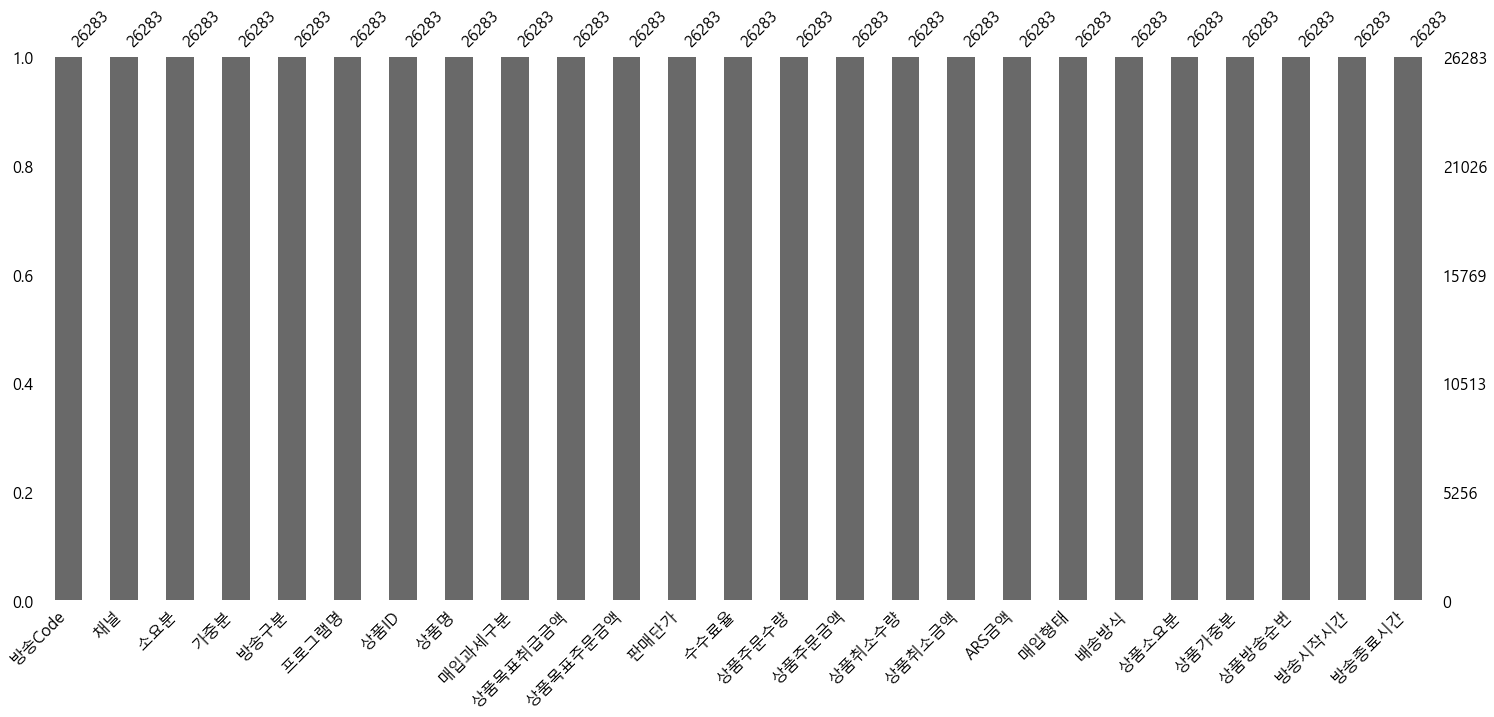

In [5]:
msno.bar(df2)

3. '방송구분'에 따른 '상품주문수량'의 평균을 계산하시오 

In [6]:
df2.pivot_table(index='방송구분', values='상품주문수량', aggfunc='mean')

,상품주문수량
방송구분,
녹화방송,337.871795
생방송,1154.316529
재방송,437.807774


4. df2의 모든 연속형 데이터의 기술통계량을 확인 

In [7]:
df2.describe()

,방송Code,소요분,가중분,상품ID,상품목표취급금액,상품목표주문금액,판매단가,수수료율,상품주문수량,상품주문금액,상품취소수량,상품취소금액,ARS금액,상품소요분,상품가중분,상품방송순번
count,2.628300e+04,26283.000000,26283.000000,2.628300e+04,2.628300e+04,2.628300e+04,2.628300e+04,26283.000000,26283.000000,2.628300e+04,26283.000000,2.628300e+04,26283.000000,26283.000000,26283.000000,26283.000000
mean,6.714543e+12,60.463501,62.738850,1.063470e+07,4.893658e+07,7.169959e+07,2.145554e+05,22.911692,947.609367,6.593023e+07,38.634593,3.145444e+06,1255.972454,37.090313,37.118088,2.854431
std,4.545276e+12,10.753614,33.412849,3.242029e+05,4.893987e+07,8.129376e+07,5.182702e+05,5.893382,1122.817191,9.141624e+07,52.981660,5.629631e+06,2092.334704,22.419075,31.435586,10.552536
min,1.010036e+09,2.900000,1.600000,1.001098e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,1.021254e+12,59.900000,42.800000,1.043544e+07,1.097226e+07,1.575876e+07,4.090000e+04,22.000000,85.000000,1.259542e+07,5.000000,4.884570e+05,1000.000000,18.700000,12.700000,1.000000
50%,1.006229e+13,60.000000,59.000000,1.058600e+07,3.448367e+07,4.971633e+07,5.990000e+04,25.000000,527.000000,4.068090e+07,21.000000,1.806076e+06,1000.000000,30.000000,27.700000,1.000000
75%,1.020260e+13,65.000000,90.400000,1.097324e+07,7.503096e+07,1.033874e+08,1.090000e+05,25.500000,1455.500000,9.044955e+07,54.500000,3.816610e+06,1000.000000,60.000000,53.800000,2.000000
max,1.309233e+13,180.000000,270.800000,1.118091e+07,7.378715e+08,1.229786e+09,7.990000e+06,52.770000,12119.000000,1.583191e+09,892.000000,2.335461e+08,30000.000000,145.000000,270.800000,99.000000


5. '방송구분'에서 '재방송'에 해당하는 데이터만 뽑아 '상품목표주문금액'이 높은 상위 100개 데이터를 추출 

In [8]:
cond1 = (df2['방송구분']=='재방송')
df2.loc[cond1].sort_values(by='상품목표주문금액', ascending=False).head(100)

,방송Code,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,...,상품취소수량,상품취소금액,ARS금액,매입형태,배송방식,상품소요분,상품가중분,상품방송순번,방송시작시간,방송종료시간
14838,1.129148e+13,TV,120.0,167.5,재방송,재방_상조,10759036,예다함 상조,과세,445238913,...,3,13609092,0,위탁매입,협력사배송,120.0,167.5,1,2021-02-06T21:55,2021-02-06T23:55
23777,1.130238e+13,TV,70.0,88.4,재방송,재방_렌탈,11124605,[가자제주닷컴] 제주여행 2박 3일 패키지_14,과세,121415934,...,2,1028472,0,위탁매입,협력사배송,70.0,88.4,1,2021-09-16T20:15,2021-09-16T21:25
22868,1.051229e+13,TV,59.8,93.5,재방송,렌탈,11025783,"[렌탈]스마트카라 음식물처리기(PCS 350, PCS 500D)",과세,120501164,...,4,5393456,0,위탁매입,협력사배송,59.8,93.5,1,2021-08-25T20:45,2021-08-25T21:45
23763,1.129238e+13,TV,60.0,78.2,재방송,재방_상조,11109971,"예다함 상조(19.08 사은품변경_로봇청소기,에어프라이기,소댕5종)",과세,229977054,...,5,22681820,0,위탁매입,협력사배송,60.0,78.2,1,2021-09-16T09:40,2021-09-16T10:40
23787,1.051238e+13,TV,60.0,71.5,재방송,재방_렌탈,11025783,"[렌탈]스마트카라 음식물처리기(PCS 350, PCS 500D)",과세,98273111,...,4,5393456,0,위탁매입,협력사배송,60.0,71.5,1,2021-09-16T22:25,2021-09-16T23:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22169,1.007222e+13,TV,60.0,69.3,재방송,재방_인테리어,11065166,무이자_[베디스]LED 서랍형 침대 K_협탁,과세,83926133,...,3,1549092,1000,위탁매입,협력사배송,10.0,11.6,1,2021-08-09T19:40,2021-08-09T20:40
4092,1.010409e+12,TV,65.0,52.4,재방송,재방_의류,10434936,[Johanex S] 요하넥스S 코트나 트렌치 재킷,과세,61697610,...,108,6576351,1000,위탁매입,협력사배송,65.0,52.4,1,2020-04-20T06:10,2020-04-20T07:15
13034,1.010130e+13,TV,70.0,67.2,재방송,재방_의류,10703217,[미넴레이디] 폭스풀스킨 롱 해비구스 점퍼,과세,60624083,...,218,46788308,10000,위탁매입,협력사배송,35.0,33.6,1,2020-12-18T23:45,2020-12-19T00:55
14861,1.014149e+13,TV,60.0,68.1,재방송,재방_속옷,10724692,레쓸 에어로웜 란쥬쉐이퍼6종,과세,86086381,...,34,2099229,1000,위탁매입,협력사배송,60.0,68.1,1,2021-02-07T09:25,2021-02-07T10:25


6. '방송구분'이라는 항목에서 '녹화방송'과 '재방송' 두집단의 '상품주문수량'의 평균의 차이가 있는지 가설 검정을 수행 

In [9]:
# 6-1) '방송구분'이라는 항목에서 '녹화방송'과 '재방송' 두집단의 '상품주문수량'의 평균의 차이가 있는지 가설 검정을 수행 
#       귀무가설 : 해당 데이터의 분포는 정규분포를 따른다
#       대립가설 : 해당 데이터의 분포는 정규분포를 따르지 않는다
cond1 = (df2['방송구분']=='녹화방송')
cond2 = (df2['방송구분']=='재방송')
stats.normaltest(df2.loc[(cond1 | cond2)]['상품주문수량'])
# P-value < 0.05 | 대립가설 참 | 해당 데이터의 분포는 정규분포를 따르지 않는다

NormaltestResult(statistic=3970.63131828541, pvalue=0.0)

In [10]:
# 귀무가설 : '녹화방송'과 '재방송' 두집단의 '상품주문수량'의 평균의 차이가 없다. 
# 대립가설 : '녹화방송'과 '재방송' 두집단의 '상품주문수량'의 평균의 차이가 있다.
stats.ranksums(df2.loc[cond1]['상품주문수량'], df2.loc[cond2]['상품주문수량'])
# P.value > 0.05 / 귀무가설 참 / '녹화방송'과 '재방송' 두집단의 '상품주문수량'의 평균의 차이가 없다.

RanksumsResult(statistic=-1.205255162207089, pvalue=0.22810481319295106)

7. '방송구분'에서 '녹화방송'에 해당하는 데이터만 뽑아 '상품주문금액'의 평균과 중앙값의 차이를 계산 

In [11]:
cond1 = (df2['방송구분']=='녹화방송')
df2.loc[cond1]['상품주문금액'].mean() - df2.loc[cond1]['상품주문금액'].median()

6953971.435897436

8. '상품목표취급금액'과 '상품주문금액'간의 관계를 산점도로 시각화 

<AxesSubplot:xlabel='상품목표취급금액', ylabel='상품주문금액'>

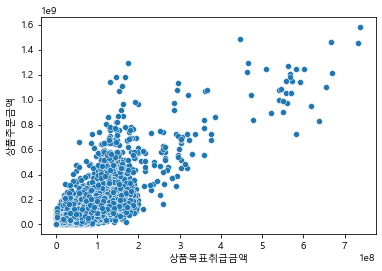

In [12]:
sns.scatterplot(data=df2, x='상품목표취급금액', y='상품주문금액')

9. '매입형태'에 따라 '배송방식'이 달라지는지 가설검정을 수행

In [13]:
df2_cross = pd.crosstab(df2['매입형태'], df2['배송방식'])
df2_cross

배송방식,당사배송,직택배,협력사배송
매입형태,,,
위탁매입,1,996,24267
직매입,1019,0,0


In [14]:
# 매입형태에 따라 배송방식이 달라지는가?
# 귀무가설 : 매입형태과 배송방식 항목은 서로 독립이다. (연관성이 없다)
# 귀무가설 : 매입형태과 배송방식 항목은 서로 독립이 아니다. (연관성이 있다)
stats.chi2_contingency(df2_cross)
# chi2 통계량 | P-value | 자유도 | 기댓값
# P-value < 0.5 | 대립가설 참 | 연관성이 있다.

(26256.193038804344,
 0.0,
 2,
 array([[  980.45428604,   957.38477343, 23326.16094053],
        [   39.54571396,    38.61522657,   940.83905947]]))